Problem 2: Hopf bifurcation

By plotting phase portraits and trajectories on the computer for different values of $\mu$, show that the system
undergoes a Hopf bifurcation at $\mu =0$. Is it subcritical or supercritical? (2 points)
Hint: You may need to look at $\mu$ values very close to 0 to see the characteristics of the Hopf bifurcation
locally at the origin, because more complicated (global) changes are happening further away from 0

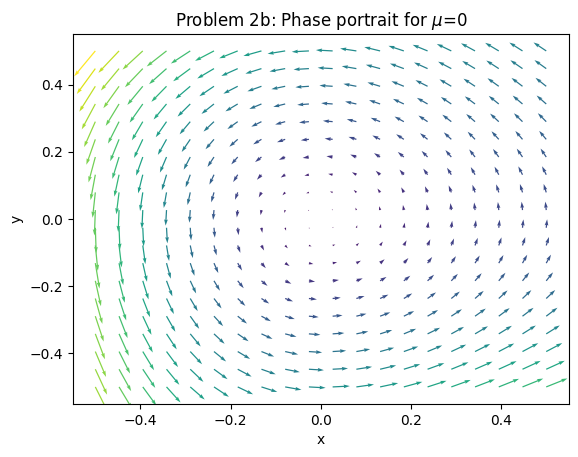

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def hopf_system(x,y, mu):
    dx = -y+mu*x+x*y**2
    dy = x+mu*y-x**2
    return dx,dy

def plot_phase_portrait(mu):
    num_vectors = 20
    x,y = np.meshgrid(np.linspace(-0.5,0.5,num_vectors), np.linspace(-0.5,0.5,num_vectors))
    u = hopf_system(x, y, mu)[0]
    v = hopf_system(x,y, mu)[1]

    plt.quiver(x,y,u,v,np.hypot(u, v), width = 0.0025)
    plt.plot()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Problem 2b: Phase portrait for $\mu$={mu}")
plot_phase_portrait(0)

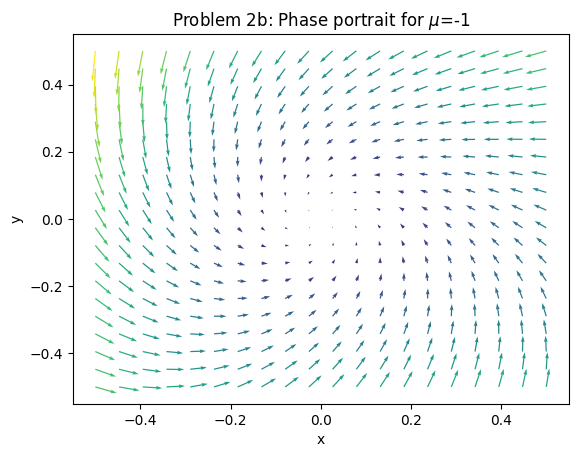

In [6]:
plot_phase_portrait(-1)

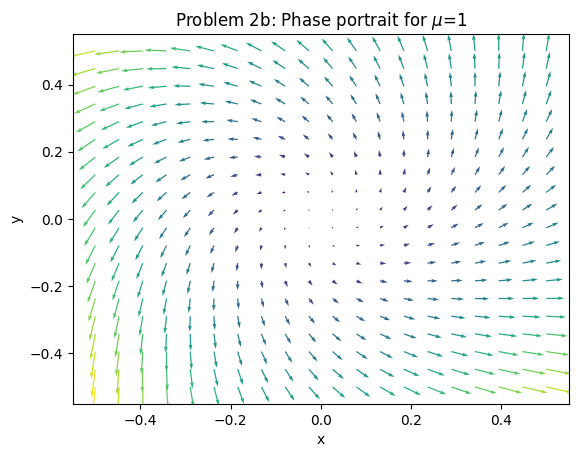

In [7]:
plot_phase_portrait(1)

Text(0.5, 1.0, 'Problem 3d: Nullclines')

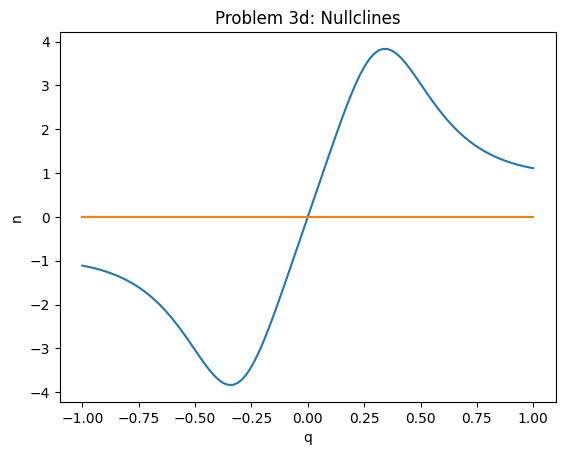

In [54]:
alpha = 1
gamma = 5
epsilon = 10**(-4)
alpha_q = 0.02
alpha_qp =0.5
gamma_q = 0.3
q_c = 1
m = 4

def synthetic_control(t, y):
    n = y[0]
    q = y[1]
    f = (q**m)/(q_c**m + q**m)
    dn = alpha*n - f*gamma*n
    dq = ((alpha_q+alpha_qp*f)*n - gamma_q*q)
    return [dn, epsilon*dq]

def nullcline_1(q):
    f = (q**m)/(q_c**m + q**m)
    return gamma_q*q/(alpha_q+alpha_qp*f)

list_q = np.linspace(-1,1,100)
plt.plot(list_q, nullcline_1(list_q))
plt.plot(list_q, np.zeros(list_q.shape[0]))
plt.ylabel("n")
plt.xlabel("q")
plt.title("Problem 3d: Nullclines")

Text(0.5, 1.0, 'Trajectory in phase space')

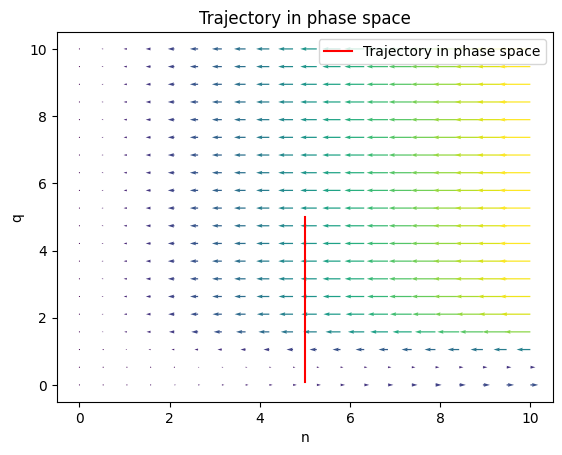

In [79]:
t = np.linspace(0,100,100)
vals = odeint(synthetic_control, [5,5],t, tfirst=True)
num_vectors = 20
n , q = np.meshgrid(np.linspace(0,10,num_vectors), np.linspace(0,10,num_vectors))
u = synthetic_control(t, [n,q])[0]
v = synthetic_control(t, [n,q])[1]
plt.quiver(n,q,u,v,np.hypot(u, v), width = 0.0025)
plt.plot(vals[0], vals[1], "r", label = "Trajectory in phase space")
plt.xlabel("n")
plt.ylabel("q")
plt.legend()
plt.title("Trajectory in phase space")